### Analysis of Grocery shopping data from Mint.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rows = pd.read_csv("grocery.csv")

In [4]:
rows.count()


Date                    585
Description             585
Original Description    585
Amount                  585
Transaction Type        585
Category                585
Account Name            585
Labels                    7
Notes                     0
dtype: int64

In [5]:
rows.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
0,8/27/2016,Safeway,SAFEWAY STORE 0999,16.97,debit,Groceries,Saphire,NaN,NaN
1,8/27/2016,India Cash Carry,INDIA CASH & CARRY,13.63,debit,Groceries,Saphire,NaN,NaN
2,8/24/2016,India Cash Carry,INDIA CASH & CARRYnull,12.58,debit,Groceries,Saphire,NaN,NaN
3,8/22/2016,Safeway,SAFEWAY STORE00009787null,8.33,debit,Groceries,Saphire,Travel trip_2016_fort_bragg,NaN
4,8/22/2016,Neelam Pacific Market,NEELAM PACIFIC MARKETnull,40.38,debit,Groceries,Saphire,NaN,NaN


In [6]:
print rows["Description"].value_counts() 


Safeway                      231
Ralphs                        46
Costco                        39
Whole Foods                   36
Bharat Bazar                  24
Jai Ho Indian                 23
Sam Hort Farmers              15
India Cash Carry              14
India Sweet & Spices          14
Wegman's                      12
New India Bazar               11
Vons                          10
Trader Joe's                  10
Canyon Market                  9
Smart & Final                  8
Furnace                        6
Universal Delta                6
Neelam Pacific Market          5
Lucca Ravioli                  4
Hill Market                    3
India Cash & Carry             3
Ralph's Grocery                3
ATM Withdrawal Miss            3
Namaste Plaza                  3
Grocery                        3
Walgreens                      2
Patel Brothers                 2
Stage Stop Mini Mart           2
Wine & Spirits                 2
Mi Pueblito Market             2
Rincon Mar

In [24]:
business_counts = rows["Description"].value_counts()
np.sum(business_counts == 1), np.sum(business_counts == 2), np.sum(business_counts == 3)

(24, 10, 6)

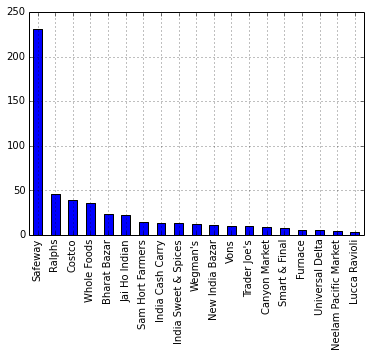

In [26]:
min_threshold = 3
business_thresh = business_counts [ business_counts > min_threshold]
    
business_thresh.plot(kind='bar')

In [32]:
business_group = rows.groupby("Description")

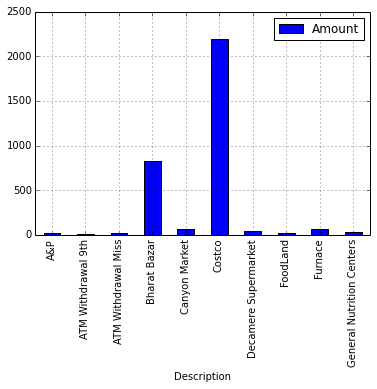

In [113]:
business_group[["Amount"]].sum()[:10].plot(kind='bar')

In [125]:
def top(df, column, n=5): 
    return df.sort_index(by=column, ascending=False)[:n]

def sum(df, column, n=5):
    x = df[column].sum()
    x.sort(ascending=False)
    return x[:n]
def count(df, column, n=5):
    x = df[column].count()
    x.sort(ascending=False)
    return x[:n]
def f(df, column, func, n=5):
    x = df[column].apply(func)
    x.sort(ascending=False)
    return x[:n]

#business_group["Amount"].sum()[:10].plot(kind='bar')
#top3segments = business_group.apply(top, column='Amount', n=10)


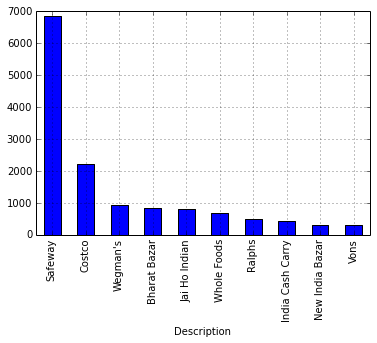

In [122]:
top3segments = sum(business_group, column='Amount', n=10)

top3segments.plot(kind='bar')

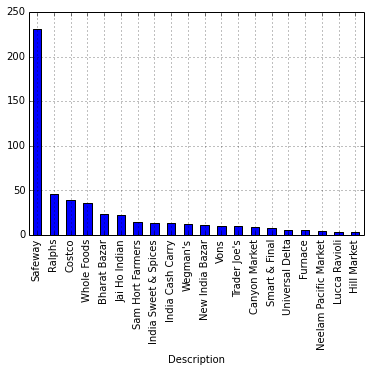

In [128]:
count(business_group, column='Amount', n=20).plot(kind='bar')

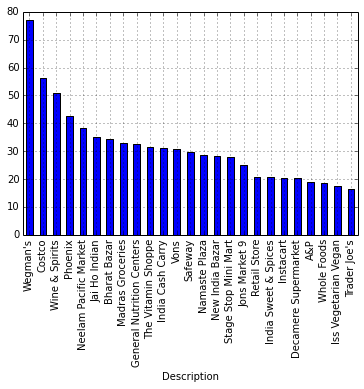

In [127]:
f(business_group, column='Amount', func=np.mean, n=25).plot(kind='bar')